In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
df=pd.read_csv("retail_data.csv",encoding="ISO-8859-1")
df.head()


,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,æEC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
df.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [5]:
df.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229.000000,183.000000,48.000000,48.000000,0.0,229.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,601742.572052,1.842459,1.874375,10.229167,NaN,1045.323144,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,6573.378113,2.595590,2.313372,14.925688,NaN,220.032076,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600033.000000,0.550000,0.530000,2.000000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600059.000000,1.070000,1.150000,6.000000,NaN,1030.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.622500,10.500000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,25.000000,10.950000,73.000000,NaN,3121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.City.value_counts()

CHENNAI           146
KANCHIPURAM        44
THIRUVALLUR        24
VELLORE             6
KRISHNAGIRI         3
TIRUVANNAMALAI      2
VILLUPURAM          2
PONDICHERRY         1
CUDDALORE           1
Name: City, dtype: int64

In [153]:
df1=df.drop(columns=["Aesthetics","Reduce Street Noise","Reduce Street Noise",
                     "Low Maintenance","Monsoon Proof","Better Lighting","Reduce AC Energy Cost",
                     "Second Action-Call Status.1"])
df1.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Quote QTY,Order Recd\Lost,Date DD/MM/YY.3,Order Val. (Rs. Lac),Order QTY,Quote ID (as per match to CCC Records),Remarks-Brand and value if lost to UPVC,Remarks,Price Per Sft,Benefits
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,3,Order Received,19-Aug-16,0.54,3.0,SPN58634,won,NaN,1105,Aesthetics & Street Noise
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Lost to Aluminum,NaN,NaN,NaN,NaN,Budget constraint,Price Issue,985,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,42,Delivery Time Not Possible,NaN,NaN,NaN,NaN,follow up,Delivery Issue,918,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,9,Lost to Aluminum,NaN,NaN,NaN,no response,NaN,Price Issue,919,NaN
4,April'16,11-Apr-16,æEC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,8,Order Received,21-May-16,1.63,8.0,SPN43642,follow up,NaN,1350,Reduce AC Energy Cost


In [154]:
df1["Status"].fillna(0,inplace=True)

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 33 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [156]:
df1["Dealer Name"].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           14
Pearlson       9
pearlson       7
Name: Dealer Name, dtype: int64

In [159]:
df1["Status"].value_counts()

Lost    176
Won      53
Name: Status, dtype: int64

In [160]:
df1.groupby(["Status","Dealer Name"])

In [161]:
df1.shape

(229, 33)

Text(0.5, 0, 'Enquiries in the months')

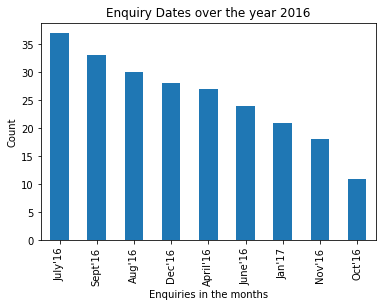

In [162]:
#Inquiries per month

df1.Month.value_counts().plot(kind="bar")
plt.title("Enquiry Dates over the year 2016")
plt.ylabel("Count")
plt.xlabel("Enquiries in the months")

In [34]:
#Maximum inquiries happened in the month of July.

Text(0.5, 1.0, 'Business Type')

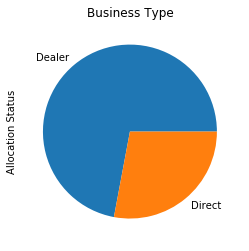

In [163]:
df1["Allocation Status"].value_counts().plot(kind="pie")

plt.title("Business Type")

In [36]:
# max inquiries are handled by dealers than direct business.

Text(0.5, 0, 'Lost vs Won')

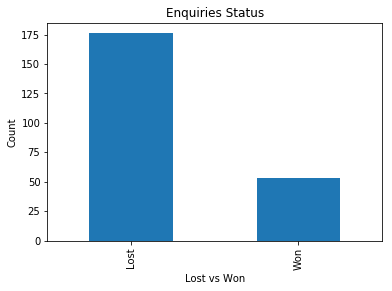

In [164]:
df1.Status.value_counts().plot(kind="bar")
plt.title("Enquiries Status")
plt.ylabel("Count")
plt.xlabel("Lost vs Won")

In [38]:
#Mostly  orders are lost as shown above.

Text(0, 0.5, 'Count')

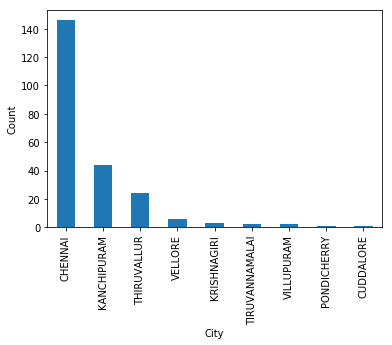

In [165]:
#City wise counts:

df1.City.value_counts().plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Count")

In [40]:
#max no of inquiries are done in chennai and least in cuddalore.
#chennai and kanchipuram are major businees focus areas.

In [166]:
#Type of project:

df1["Type of Project"].value_counts()

Renovation          142
New Construction     87
Name: Type of Project, dtype: int64

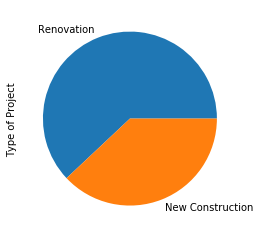

In [167]:
df1["Type of Project"].value_counts().plot(kind="pie")



In [168]:
# Source type:
df1["Source"].value_counts()

Internet               124
Friends or Family       98
Just dial                6
Current User             1
Name: Source, dtype: int64

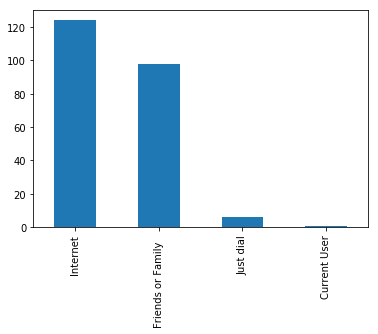

In [169]:
df1["Source"].value_counts().plot(kind="bar")

In [ ]:
#Through Internet and friends or family,sources were reliable.


In [170]:
df1["Dealer Name"].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           14
Pearlson       9
pearlson       7
Name: Dealer Name, dtype: int64

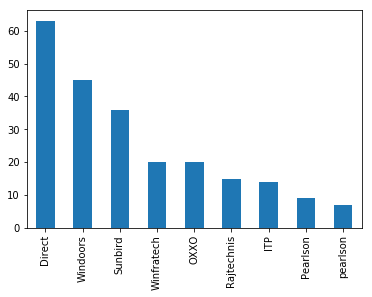

In [171]:
df1["Dealer Name"].value_counts().plot(kind="bar")

#Direct inquiries were most. 
#bASED ON IQUIRY COUNT, TOP 3 DEALERS WERE windoors,sunbird,OXXO.

In [172]:
df1["Dealer Name"].groupby(df1["Status"]).value_counts()

Status  Dealer Name
Lost    Windoors       39
        Direct         38
        Sunbird        25
        Winfratech     18
        OXXO           16
        ITP            14
        Rajtechnis     14
        Pearlson        8
        pearlson        4
Won     Direct         25
        Sunbird        11
        Windoors        6
        OXXO            4
        pearlson        3
        Winfratech      2
        Pearlson        1
        Rajtechnis      1
Name: Dealer Name, dtype: int64

In [173]:
#Visualize through 1st time enquiry count:

df1["First Action-Call Status"].value_counts()

Appointment Fixed                192
Budget Constraint                 25
Design not Feasible                6
No Requirement-Awareness Call      5
Time Frame Not Possible            1
Name: First Action-Call Status, dtype: int64

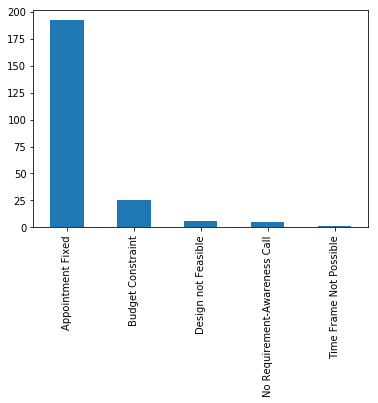

In [174]:
df1["First Action-Call Status"].value_counts().plot(kind="bar")

Quote to Be Submitted       189
Design not Feasible           1
Further Meeting Required      1
Name: Second Action-Call Status, dtype: int64

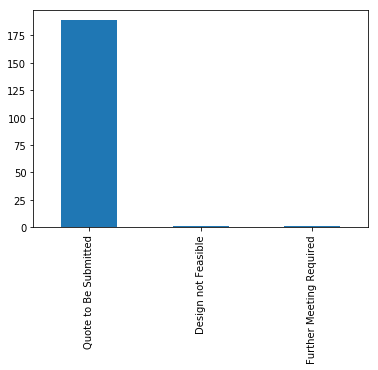

In [175]:
df1["Second Action-Call Status"].value_counts().plot(kind="bar")
df1["Second Action-Call Status"].value_counts()

In [60]:
#189 quotes submitted in 2nd call.

Text(0.5, 1.0, 'Third discussion status')

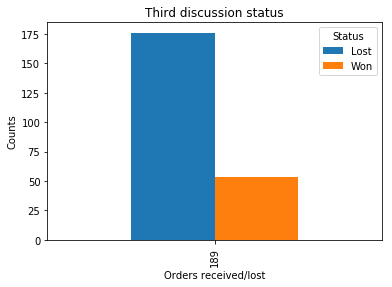

In [176]:
#crosstab:

pd.crosstab(df1["Third Action-Quote Given"].count(),df1.Status).plot(kind="bar")
plt.ylabel("Counts")
plt.xlabel("Orders received/lost")
plt.title("Third discussion status")

In [177]:
pd.crosstab(df1["Third Action-Quote Given"].count(),df1.Status)

Status,Lost,Won
row_0,,
189,176,53


In [178]:
df1["Third Action-Quote Given"].fillna("Others",inplace=True)

In [14]:
pd.crosstab(df1["Third Action-Quote Given"].count(),df1["Status"])

Status,Lost,Won
row_0,,
229,176,53


In [179]:
#Reasons for Non conversions:

df1["Remarks"].value_counts()

Price Issue                      103
Budget Constraint                 26
Design Infeasibility              23
Price issue                        7
Delivery Issue                     3
No Requirment                      2
Others                             1
Design Not Feasible                1
No Requirement                     1
Service Infeasibility              1
Delivery Issve                     1
Design Infeasibe My                1
No Requirement-Awareness Call      1
Name: Remarks, dtype: int64

In [16]:
#Mostly because of price issue, business was not getting converted.

In [180]:
df1.rename(columns={list(df1)[24]:"Order-Recd-Lost"},inplace=True)

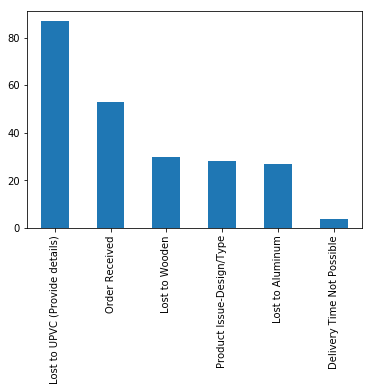

In [181]:
df1["Order-Recd-Lost"].value_counts().plot(kind="bar")

In [34]:
#mostly, reason of order lost was due to UPVC(Provide Details)


In [182]:
df1.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', 'Order-Recd-Lost', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ', 'Remarks', 'Price Per Sft',
       'Benefits'],
      dtype='object')

In [183]:
df1["Order QTY"].fillna(0,inplace=True)

In [184]:
df1["Order Val. (Rs. Lac)"].fillna(0,inplace=True)

In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 33 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [186]:
pd.crosstab(df1["Dealer Name"].count(),df1.Status)

Status,Lost,Won
row_0,,
229,176,53


In [187]:
pd.crosstab(df1.Status.count(),df1["Dealer Name"])


Dealer Name,Direct,ITP,OXXO,Pearlson,Rajtechnis,Sunbird,Windoors,Winfratech,pearlson
row_0,,,,,,,,,
229,63,14,20,9,15,36,45,20,7


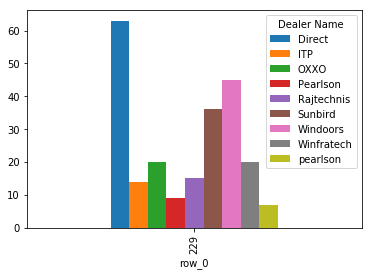

In [188]:
pd.crosstab(df1.Status.count(),df1["Dealer Name"]).plot(kind="bar")

In [189]:
pd.crosstab(df1.Status,df1["Dealer Name"])

Dealer Name,Direct,ITP,OXXO,Pearlson,Rajtechnis,Sunbird,Windoors,Winfratech,pearlson
Status,,,,,,,,,
Lost,38,14,16,8,14,25,39,18,4
Won,25,0,4,1,1,11,6,2,3


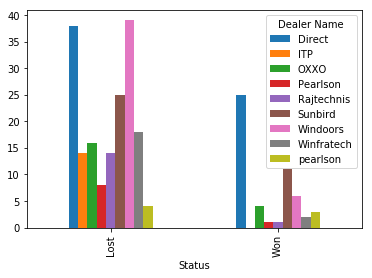

In [190]:
pd.crosstab(df1.Status,df1["Dealer Name"]).plot(kind="bar")

In [45]:
#Success rate of each and every dealer:
#Dealer wise analysis:

In [47]:
#Import data through SQL

In [49]:
from pandasql import sqldf

ModuleNotFoundError: No module named 'pandasql'

In [48]:
from pandasql import sqldf
pysqldf=lambda q:sqldf(q,globals())

ModuleNotFoundError: No module named 'pandasql'

In [50]:
#Use slicing for different dealer analysis:


In [191]:
df1.shape

(229, 33)

In [192]:
df_Direct=df1[df1["Dealer Name"]=="Direct"]

In [206]:
df1["Second Action-Call Status"].fillna(0,inplace=True)

In [207]:
df1["Third Action-Quote Given"].fillna(0,inplace=True)

In [208]:
df_Direct.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Quote QTY,Order-Recd-Lost,Date DD/MM/YY.3,Order Val. (Rs. Lac),Order QTY,Quote ID (as per match to CCC Records),Remarks-Brand and value if lost to UPVC,Remarks,Price Per Sft,Benefits
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,9,Lost to Aluminum,NaN,0.00,0.0,no response,NaN,Price Issue,919,NaN
30,June'16,11-Jun-16,EC11061651852,Direct,Won,TAMILNADU,KANCHIPURAM,600044,New Construction,6 to 10,...,2,Order Received,16-Aug-16,0.42,2.0,SNT63938,won,NaN,3121,Nil
37,June'16,18-Jun-16,EC18061652485,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,1 to 5,...,13,Order Received,21-Jul-16,0.93,13.0,SNT58427,order received,NaN,967,Aesthetics & Low Maintenance
43,June'16,23-Jun-16,EC07031644910,Direct,Lost,TAMILNADU,CHENNAI,600020,New Construction,6 to 10,...,25,Lost to UPVC (Provide details),NaN,0.00,0.0,NaN,lost to linget,Price Issue,947,NaN
45,June'16,26-Jun-16,EC26061653135,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,6 to 10,...,4,Lost to UPVC (Provide details),NaN,0.00,0.0,NaN,lost,Price Issue,958,NaN


In [209]:
df_Direct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 3 to 228
Data columns (total 33 columns):
Month                                        63 non-null object
Enquiry Date                                 63 non-null object
Enquiry Id                                   63 non-null object
Allocation Status                            63 non-null object
Status                                       63 non-null object
State                                        63 non-null object
City                                         63 non-null object
Pincode                                      63 non-null int64
Type of Project                              63 non-null object
No of Windows                                63 non-null object
Source                                       63 non-null object
Zone                                         63 non-null object
Dealer Name                                  63 non-null object
First Action-Call made                       63 non-null object
D

In [210]:
df_Direct.shape

(63, 33)

In [211]:
pd.crosstab(df1["Dealer Name"],df1.Status)


Status,Lost,Won
Dealer Name,,
Direct,38,25
ITP,14,0
OXXO,16,4
Pearlson,8,1
Rajtechnis,14,1
Sunbird,25,11
Windoors,39,6
Winfratech,18,2
pearlson,4,3


In [212]:
df_ITP=df1[df1["Dealer Name"]=="ITP"]
df_OXXO=df1[df1["Dealer Name"]=="OXXO"]
df_Pearlson=df1[df1["Dealer Name"]=="Pearlson"]
df_Rajtechnis=df1[df1["Dealer Name"]=="Rajtechnis"]
df_Sunbird=df1[df1["Dealer Name"]=="Sunbird"]
df_Windoors=df1[df1["Dealer Name"]=="Windoors"]
df_Winfratech=df1[df1["Dealer Name"]=="Winfratech"]
df_pearlson=df1[df1["Dealer Name"]=="pearlson"]


In [213]:
df_Direct['First Action-Call Status'].value_counts()

Appointment Fixed                56
Budget Constraint                 5
No Requirement-Awareness Call     2
Name: First Action-Call Status, dtype: int64

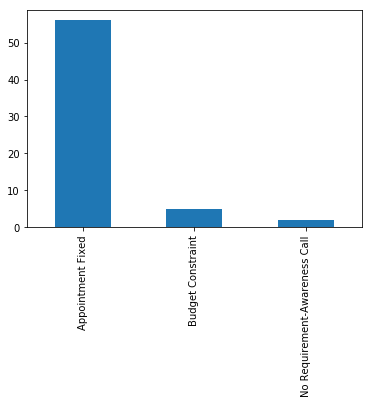

In [214]:
df_Direct['First Action-Call Status'].value_counts().plot(kind="bar")

In [91]:
# For dealer"Direct",out of 63 enquiries 56 progressed for the  second discussion
#and 5 dropped due to budget constraint and 2 were awareness calls.

In [215]:
df1.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', 'Order-Recd-Lost', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ', 'Remarks', 'Price Per Sft',
       'Benefits'],
      dtype='object')

In [216]:
df_Direct['Second Action-Call Status'].value_counts()

Quote to Be Submitted    56
Name: Second Action-Call Status, dtype: int64

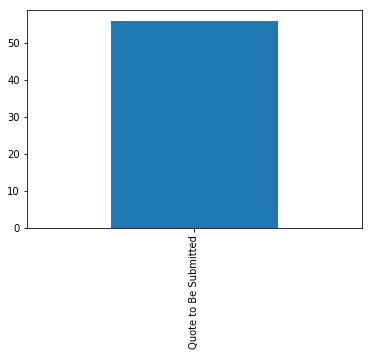

In [217]:
df_Direct['Second Action-Call Status'].value_counts().plot(kind="bar")

In [202]:
df1["Second Action-Call Status"].fillna(0,inplace=True)

In [203]:
df1["Third Action-Quote Given"].fillna(0,inplace=True)

In [218]:
df_Direct['Third Action-Quote Given'].value_counts()

yes       49
Others     7
YES        7
Name: Third Action-Quote Given, dtype: int64

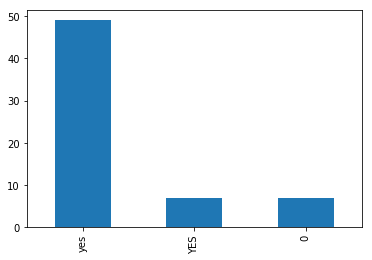

In [121]:
df_Direct['Third Action-Quote Given'].value_counts().plot(kind="bar")

In [219]:
def third_quote(x):
    if x=="yes":
        return "YES"
    elif x=="YES":
        return "YES"
        
    

In [220]:
df_Direct['Third Action-Quote Given']=df_Direct['Third Action-Quote Given'].apply(third_quote)

/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [221]:
df_Direct['Third Action-Quote Given'].value_counts()

YES    56
Name: Third Action-Quote Given, dtype: int64

In [222]:
df_Direct["Remarks"].value_counts()

Price Issue              22
Budget Constraint         5
Price issue               4
Design Infeasibility      3
No Requirment             1
No Requirement            1
Service Infeasibility     1
Delivery Issue            1
Name: Remarks, dtype: int64

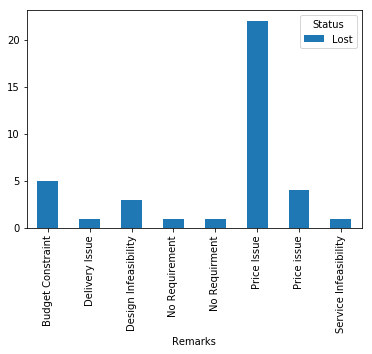

In [223]:
pd.crosstab(df_Direct['Remarks'],df_Direct['Status']).plot(kind='bar')

In [224]:
df1["Status"].fillna(0,inplace=True)

In [225]:
df_Direct[df_Direct['Status']=='Lost'].Status.count()

38

In [226]:
df_Direct["Status"].value_counts()

Lost    38
Won     25
Name: Status, dtype: int64

In [150]:
# Success rate of the dealer Direct=(25/63)*100 = 39.68

In [151]:
# ITP:


In [152]:
df_ITP.Status.value_counts()

Lost    14
Name: Status, dtype: int64

In [227]:
df_ITP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 48 to 165
Data columns (total 33 columns):
Month                                        14 non-null object
Enquiry Date                                 14 non-null object
Enquiry Id                                   14 non-null object
Allocation Status                            14 non-null object
Status                                       14 non-null object
State                                        14 non-null object
City                                         14 non-null object
Pincode                                      14 non-null int64
Type of Project                              14 non-null object
No of Windows                                14 non-null object
Source                                       14 non-null object
Zone                                         14 non-null object
Dealer Name                                  14 non-null object
First Action-Call made                       14 non-null object


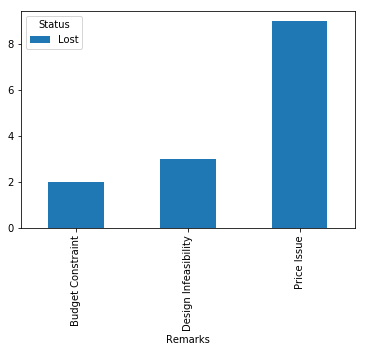

In [228]:
pd.crosstab(df_ITP['Remarks'],df_ITP['Status']).plot(kind='bar')

In [229]:
df_ITP['First Action-Call Status'].value_counts()

Appointment Fixed      9
Design not Feasible    3
Budget Constraint      2
Name: First Action-Call Status, dtype: int64

In [230]:
df_ITP['Second Action-Call Status'].value_counts()

Quote to Be Submitted    9
0                        5
Name: Second Action-Call Status, dtype: int64

In [231]:
df_ITP['Third Action-Quote Given'].value_counts()

yes       9
Others    5
Name: Third Action-Quote Given, dtype: int64